# QBio Python Workshop Week 2
## Introduction to Numpy and Matplotlib
Prepared by John Russell (johnrussell@g.harvard.edu)

**Outline**
- Jupyter Lab shortcuts
- Intro to Numpy arrays
  - Initializing
  - Shape and reshape
  - Vectorized math operations 
- Matplotlib line plots
- More arrays
  - Aggregations
  - Broadcasting
- Numpy indexing (time permitting. Focus on this next week for sure)

## Jupyter Lab Tips and Tricks

**Note** Jupyter Lab is the present and the future (notebooks are the past). I'd strongly recommend switching over if you still use jupyter notebook. To launch from the command line, type `jupyter lab`.

### Working in Jupyter Notebooks

**The Essentials**
- `Shift + Enter` executes a cell
- `Shift + Tab` shows the documentation of a function
- `Tab` will attempt to auto-complete the word you are typing

**Cell Operations**
- There are two modes in a jupyter notebook: *Edititing* mode is where you are editing text in a cell. *Command* mode is when you are outside of a cell. `Esc` while in a cell switches to command mode. `Enter` will select a cell and enter editing mode there if you are in command mode.

- `Esc + a` makes a new cell *above* your current position 
- `Esc + b` makes a new cell *below* your current position
- `Esc + m` converts a cell into a markdown cell
- `Esc + y` converts a cell into a code cell.
- `Esc + d + d` deletes a cell
- `Esc + i + i` interrupts the execution of a cell
- `Esc + 0 + 0` stops execution and restarts the kernel

## Numpy

### Lets look at an example

Below is data and an image representing the temperature of a square surface as a function of time. Right now this 3D data is a list of list of lists.

In [1]:
temp_3d = [
    [[72, 72, 68, 73, 72],
    [68, 73, 70, 67, 68],
    [72, 68, 69, 73, 72],
    [72, 68, 69, 74, 71],
    [70, 73, 72, 68, 71]],

    [[67, 71, 73, 68, 68],
    [72, 74, 69, 67, 72],
    [69, 72, 68, 71, 72],
    [71, 67, 70, 68, 67],
    [71, 68, 68, 69, 68]],

    [[67, 68, 67, 70, 69],
    [67, 67, 74, 68, 67],
    [69, 70, 74, 70, 68],
    [74, 68, 70, 74, 71],
    [69, 73, 68, 74, 68]]
]


In [2]:
def labelled_temp_plot(arr):
    """
    Make 3 panel plot showing surface temperatures or related quantites.
    Assumes arr is array-like with shape (3,N,M)
    """
    import numpy as np
    import matplotlib.pyplot as plt
    arr = np.asarray(arr)
    fig, ax = plt.subplots(1,3, figsize=(20,6))
    for i,surf in enumerate(arr):
        ax[i].set_title(f"Time={i}")
        ax[i].imshow(surf, cmap='RdBu_r',interpolation='hermite')
        for j in range(surf.shape[0]):
            for k in range(surf.shape[1]):
                ax[i].annotate(f"{surf[j][k]}", (k,j))
    return fig, ax

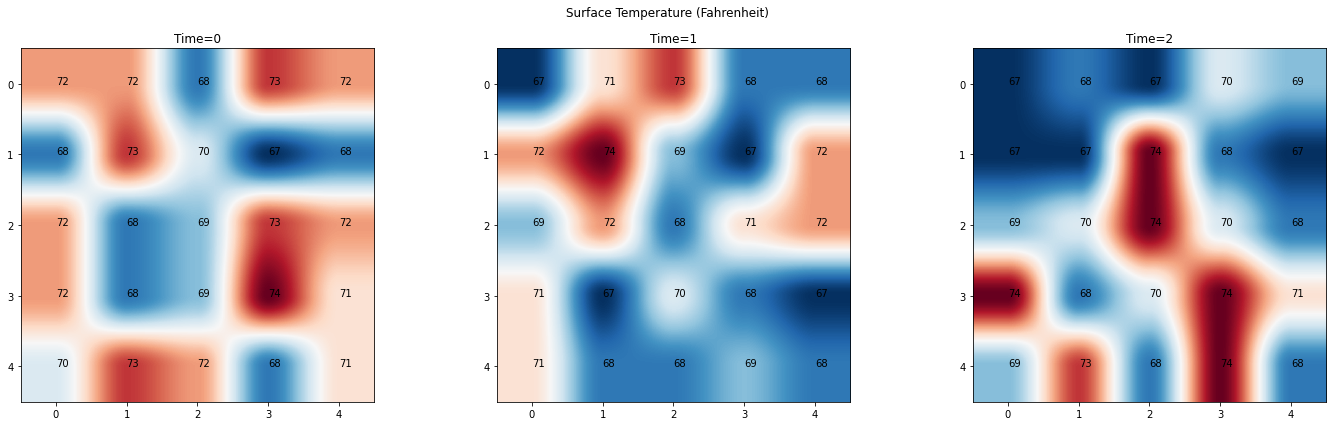

In [3]:
# I'll explain a lot about plotting like this later - for now just look at the picture
fig, ax = labelled_temp_plot(temp_3d)
fig.suptitle("Surface Temperature (Fahrenheit)")
plt.tight_layout()
plt.show()

### Lets do some simple analysis of this data

1. Convert this data to Celsius
2. Compute the average temperature over the middle row at each time point.

In [ ]:
def f2c(x):
    return (x-32)/1.8

In [ ]:
temp_3d_celsius = []

In [ ]:
middle_row_avg = []

### What are NumPy Arrays

Numpy `array` is the core of the numpy library and essentially all scientific computing and data analysis in python. 
I tend to think of them as multidimensional lists that are highly optimized for numerical data and mathematical operations.

They also have very powerful *indexing* syntax making it easy to access parts of a dataset.

Lets see how much more easily we can do the above tasks by using numpy arrays.

See https://numpy.org/doc/stable/user/absolute_beginners.html

In [ ]:
import numpy as np # canonical way to import numpy

In [ ]:
temp_arr =

In [ ]:
#celsius conversion 

In [ ]:
# middle row average

### Lets start from the beginning - How do we make arrays

- From lists as above (*be careful about shapes*)

- Methods giving you specific numbers
    - [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html#numpy.arange) Use this to generate lists of integers
    - [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) use this to generate lists of evenly spaced numbers. For example to evaluate a function at many values between 0 and 1
    
- Methods where you give the shape of an array
    - [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html#numpy.zeros) give an array of zeros in the shape you specify
    - [zeros_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html#numpy.zeros_like) gives an array of zeros in the shape of anther array
    - [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html#numpy.ones) same as zeros except filled with ones
    - [ones_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html#numpy.ones_like) sames as zeros_like except filled with ones

In [ ]:
# initialize an array
# arr = np.array([])

In [ ]:
# look at it


### Doing math with Numpy

https://numpy.org/doc/stable/reference/routines.math.html

### Array shapes and reshape

Arrays have several *attributes* the can give you very useful information both for writing code and debugging.

Chief among these is `np.shape` or `.shape`.

In [ ]:
# shape

In [ ]:
# ndim

In [ ]:
# size

### Dtypes 

Probably the second most useful array attribute is `arr.dtype` this specifies the memory format for the numbers in an array. Note here than unlike lists and most other python containers, numpy arrays can only hold a single type of entry. This is a major part of what makes them very fast for doing math.

You can read more than you could possibly want to know about numpy dtypes [here](https://numpy.org/doc/stable/reference/arrays.dtypes.html).

In [ ]:
a = np.arange(5)
b = np.linspace(0,1,11)

In [ ]:
print(f"{a.dtype=}")
print(f"{b.dtype=}")

You can change the dtype of an array with the `astype()`. The main reason to do this is for memory saving purposes. E.g. a 3 Gb, 8-bit image dataset -> 24 Gb in numpy by default.

In [ ]:
a.astype(np.uint8)

**Important Note 1**

You need to be careful with this since by default numpy wont raise any warnings about throwing away information

In [ ]:
b.astype(np.uint8)

**Important Note 2**

By default, `astype` returns a copy of the array with the same data and the new dtype. So even after the last cell, `b` is unchanged. You can either reassign e.g. `a = a.astype(np.uint8)` or pass `copy=False` to change the type inplace e.g. `a.astype(np.uint8, copy=False)`.

In [ ]:
np.linspace(0,1,11).astype(np.uint8)

## Breakout Room Exercises 1

#### 1. Triangular numbers

The [triangular numbers](https://en.wikipedia.org/wiki/Triangular_number) are defined recursively as $T(0)=0$, $T(1)=1$, $T(n)=T(n−1)+n$.

However there is also an explicit formula. 
$$T_n = \frac{n(n+1)}{2}$$

Calculate the first 1000 triangular numbers using the explicit formula and numpy arrays (No loops!).

*Hint* The first 5 triangular numbers are: `[0, 1, 3, 6, 10]` and the 1000th triangular number is`499500`.

*Hint* A good start is to make an array that represents $n$ in the triangular numbers formula. i.e. `[1,2,3,....,1000]`.

#### 2. Calculating an integral

An import integral equation is given below

$$ \int_{-\infty}^{\infty} e^{-x^2} dx = \sqrt{\pi} $$

Confirm this result numerically by 
1. Creating arrays for $x$ and $y=e^{-x^2}$. We obviously cannot truly integrate to infinity but the result can be well approximated by integrating from -1000 to 1000 using $10^5$ points. 
1. Read the documentation for [`np.trapz`](https://numpy.org/doc/stable/reference/generated/numpy.trapz.html) and then use it to compute the integral.
1. Compare your results to the true answer by looking at the absolute difference between the two and then by computing the the fractional error in your estimate using the formula below.  

$$\text{Error} = \dfrac{|\text{Estimate} - \text{True}|}{\text{True}}$$

## Intro to matplotlib 

Matplotlib is the standard plotting software in the scientific python ecosystem. There are some newer libraries gaining traction but many of them build on top of matplotlib so it is worth knowing. 

There are a few slightly different ways to use matplotlib. I'll show you two of them. The way that that most poeple do it and the way that is considered best practice by the developers of matplotlib (they are not very different).

[**Official Matplotlib Cheatsheets**](https://github.com/matplotlib/cheatsheets) - Really great reference for all levels of matplotlib users.

[**Tutorials**](https://matplotlib.org/3.3.4/tutorials/index.html)

**Good googling phrase:** "How to make a ___ plot in matplotlib"
#### Line Plots

In [ ]:
# canonical import line for plotting 
import matplotlib.pyplot as plt 

In [ ]:
# generate some data
x_plt = np.linspace(-3, 3, 200) 
y_plt = np.exp(-x_plt**2)*np.sin(10*x_plt)

In [ ]:
plt.plot(x_plt,y_plt)
plt.show()

In [ ]:
# plot multiple curves

In [ ]:
# Add some basic labels, and styling

In [ ]:
# save figure

## Plotting exercise

**Part a.**
A gaussian or normal distribution for a single variable is given by the following formula:

$$p(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$

where $\mu$ is the mean and $\sigma$ is the standard deviation. Plot normal distributions with the following combinations of mean and standard deviation:

| Mean | Std. Dev |
| ---- | ---------|
| 0 | 1 |
| 0 | 5 |
| -2 | 1 |
| 3 | 5 |

 
*Hint 1:* Write a python function that takes an array `x` and two numbers `mu` and `sigma` and returns $p(x; \mu, \sigma)$. Then call this function multiple times.

*Hint 2:* Write a `for` loop to iterate over the different parameters and call `plt.plot` each time.

**Part b.**
Add a legend to this graph that labels each curve with its mean and standard deviation. Check out the cheatsheets linked above or google "matplotlib legend".

**Part c.** 
Experiment with more styling options. For instance changing the colors or styles of the different curves, adding labels to the axes, or some other things from the cheatsheets.

## More Numpy: Aggregations, Axes, and Broadcasting

Aggregations are operations that take in many numbers and *aggregate* them into a single number (e.g. `sum`, `mean`, `std`, `prod`).

For 1D arrays this is pretty straightforward.

In [ ]:
X1 = np.array([1,3,5,7])

In [ ]:
X1.mean() # equivalent to np.mean(X1)

For higher dimensions we need to think a little bit more about applying these operations. Often we want to aggregate over the rows or columns of a matrix for example. All numpy aggregating functions take an `axis` argument to accomplish this.

![numpy aggregations](https://numpy.org/doc/stable/_images/np_matrix_aggregation_row.png)


In [ ]:
data = np.arange(6).reshape(3,2)+1

In [ ]:
# mean

In [ ]:
# mean over rows

In [ ]:
# mean over columns

### Broadcasting

We have already seen the simplest case of broadcasting.

In [ ]:
x = np.arange(5)

In [ ]:
6*x +1

Even though `x` is an array, numpy knows to *broadcast* the multiplication and addition of single numbers over each value of the array. Among other things, this makes your code much more closely resemble mathematical notation. Compare the above numpy code with how we would do this with a list

```python
y = []
for i in range(len(x)):
    y.append(6*x[i]+3)
```

Broadcasting can also work between arrays. The rule is roughly that the arrays must be broadcastable along the *last dimensions* of the larger arrays. Being broadcastable means they either have the same shape or one of them has shape 1.

In [ ]:
a = 10*np.arange(12).reshape(4,3)
b1 = np.arange(3)

In [ ]:
a + b1

In [ ]:
print(f"{a.shape=}")
print(f"{b1.shape=}")

In [ ]:
b2 = np.arange(4)

In [ ]:
a+b2

In [ ]:
a+b2[:,None]

In [ ]:
print(f'{b2.shape=}') # doesnt work
print(f'{b2[:,None].shape=}') # works - this will make more sense next week
print(f'{np.expand_dims(b2,1).shape=}') # works - same as previous 

#### Convenient argument to aggregations - `keepdims=True`

In [ ]:
a

In [ ]:
a_mean1 = np.mean(a, axis=1)

In [ ]:
a_mean1.shape

In [ ]:
a/a_mean1

In [ ]:
a_mean2 = np.mean(a, axis=1, keepdims=True)

In [ ]:
a_mean2.shape

In [ ]:
a/a_mean2

## Aggregations and Broadcasting Exercises

**Question 1:** Softmax

In machine learning we often want to assign a set of probabilities to a data point being in some class. In order to be a consistent set of probabilities they must sum to 1 since we assume that each data point must be in one of the possible classes. For numerical reasons, it is often preferebale to work with a vector of unnormalized "scores" that we convert to probabilities using the `softmax` function defined by

$$\text{softmax}({\bf x})_i = \dfrac{e^{x_i}}{\sum_j e^{x_j}}$$

Write your own softmax function that takes in a 2D numpy array with shape `(N,C)` where N is the number of data points (so each row is a separate entry) and C is the number of classes. Test your function on the synthetic data array provided.

**Note 1:** If you have done some thermodynamics you might recognize the softmax function as the boltzmann distribution where you you would say "energy" rather than "score".

**Note 2:** In real life, you should use one of the many existing implementations of softmax e.g. [`scipy.special.softmax`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.softmax.html).

**Question 3** Analyzing the heat equation

In [ ]:
# The details of this are beyond the scope of this course but are very interesting.
# Id be happy to talk about it in my office hours tomorrow
# Though you should probably go to Nick's OH if you want to *really* know about this
T = np.zeros((501,126))
T[0,50:75] = 1
# T[0] = ...
for t in range(500):
    T[t+1] = T[t] + 0.4*(np.roll(T[t],1)+np.roll(T[t],-1)-2*T[t]) 
    T[t+1,0] = T[t,0] + 0.4*(T[t,1]-T[t,0])
    T[t+1,-1] = T[t,-1] + 0.4*(T[t,-2]-T[t,-1])
    
T_plot = T[::50]
X = np.linspace(0,10,126)
dx =10/125
dt = 0.4*dx**2

The code above solves the [Heat Equation](https://en.wikipedia.org/wiki/Heat_equation) for a perfectly insulated 1D rod yielding data for the temperature of a rod as a function of time i.e. $T(x,t)$. Because computers don't easily represent continuous functions, I have solved the heat equation on a grid with 126 points at a spacing `dx=0.08` at 501 time points separated by `dt=0.00256`. The code above creates 2 arrays, `T` which contains the solution at all 501 time steps and `T_plot` which subsamples this data every 50 time points yielding 11 solutions for plotting. There is also an array `X` that contains the x coordinates of all the grid points.

**Part a.** Make a plot showing the 11 solutions containined in `T_plot` on the same axes. I have given you some code that will color the 11 different curves in a way that I find pleasing, as well as code to make a legend. You should add labels to the axes as well as a title.

In [ ]:
# from cycler import cycler 
vc = cycler(color=plt.cm.viridis(np.linspace(0.1,0.9,11)))
fig, ax = plt.subplots()
ax.set_prop_cycle(vc)
# your code here
# ax.plot(...)

plt.legend(labels=[f"t={t:.3f}" for t in 50*dt*np.arange(11)])
plt.show()

**Part b.**

Make a plot showing the average temperature and maximum temperature as a function of time one the same axes. Be sure to add a legend, a title, and axes labels. (Use the full solution `T` to make a nice smooth curve).

**Part c.** Optional

- Compute another interesting quantity for this dataset and make a plot.
- For this simulation, I started with $T(x,0) = 1 \text{where} 4 \leq x \leq 6.$ In the code at the top of this question, change $T(x,0)$ by changing the `...` in the commented line that starts `T[0] =` to an array of your creation. It must have shape 126 for this line to work. Remake the plots in this problem and see how they compare between the two different initial conditions.